<a href="https://colab.research.google.com/github/jaeohshin/keras/blob/main/tutorial2_binary_classificiation_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary classification problem using ML on the moview review. 
1. data taken
2. make it to vector form
3. define the structure of DL
4. define the 'compile' 
5. train the model
6. validate the model with validation data
7. choose the best "epoches" 
8. use the model to predict with new data.


===
serveral things to consider
1. what would be the proper number of 
-layers
-units for each layers
-activation function


In [60]:
# Here take data and convert it to vector format

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
len(train_labels)

25000

In [7]:
max([max(sequence) for sequence in train_data])

999

In [61]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()] )
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])


In [62]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [63]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [72]:
# Here DL model definition

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="tanh")   
])

In [73]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [66]:
# Here split the test data into two parts to validate the model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [74]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 3s 67ms/step - loss: 0.8150 - accuracy: 0.6525 - val_loss: 0.4374 - val_accuracy: 0.8232
Epoch 2/15
30/30 [==============================] - 1s 41ms/step - loss: 0.3585 - accuracy: 0.8754 - val_loss: 0.3722 - val_accuracy: 0.8693
Epoch 3/15
30/30 [==============================] - 2s 54ms/step - loss: 0.2718 - accuracy: 0.9176 - val_loss: 0.3675 - val_accuracy: 0.8705
Epoch 4/15
30/30 [==============================] - 2s 57ms/step - loss: 0.2194 - accuracy: 0.9367 - val_loss: 0.3846 - val_accuracy: 0.8349
Epoch 5/15
30/30 [==============================] - 1s 48ms/step - loss: 0.1819 - accuracy: 0.9505 - val_loss: 0.3897 - val_accuracy: 0.8714
Epoch 6/15
30/30 [==============================] - 1s 42ms/step - loss: 0.1516 - accuracy: 0.9633 - val_loss: 0.5424 - val_accuracy: 0.8822
Epoch 7/15
30/30 [==============================] - 1s 40ms/step - loss: 0.1270 - accuracy: 0.9727 - val_loss: 0.6861 - val_accuracy: 0.8760
Epoch 8/15
30

In [75]:
history_dict = history.history

In [58]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Loss')

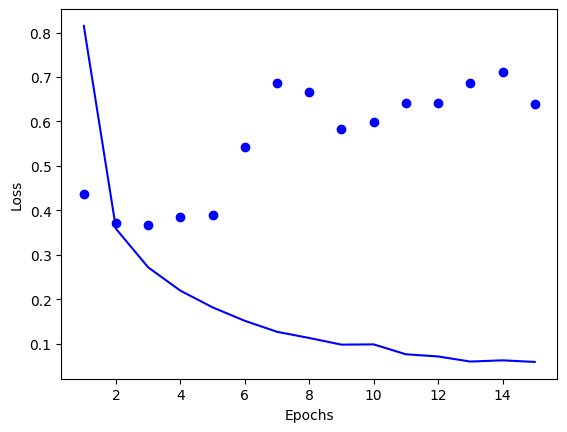

In [76]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "b", label = "Training loss")
plt.plot(epochs, val_loss_values, "bo", label = 'Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

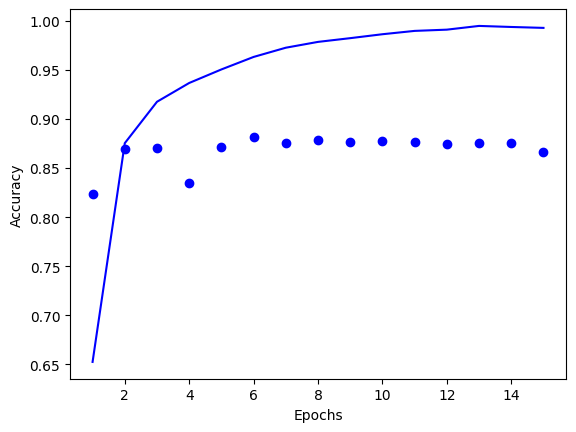

In [77]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc, "b", label = "Training accuracy")
plt.plot(epochs, val_acc, "bo", label = 'Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [22]:
# Retrain a model from scratch

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 3s 43ms/step - loss: 0.5207 - accuracy: 0.7723
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.3688 - accuracy: 0.8511
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.3275 - accuracy: 0.8660
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3252 - accuracy: 0.8620


In [23]:
results
#the first number is test loss and the second test accuracy

[0.3252441883087158, 0.8619599938392639]

In [24]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.3271178 ],
       [0.99826944],
       [0.45812228],
       ...,
       [0.09299625],
       [0.10442916],
       [0.39764148]], dtype=float32)